## MNIST 분석
* 사용 프레임워크 : 텐서플로, 케라스
* 사용 신경망 : Lenet-5, AlexNet, VGGNet

In [2]:
# 관련 라이브러리 선언
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Model
from keras import datasets
from keras.models import load_model
from keras import Input
from keras.callbacks import ReduceLROnPlateau

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# 데이터 전처리

(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_images, test_images = train_images / 255.0, test_images / 255.0

In [7]:
train_images[0].dtype

dtype('float64')

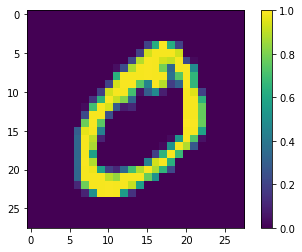

In [34]:
# 데이터 이미지 확인
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.savefig('mnist_0.png')
plt.show()


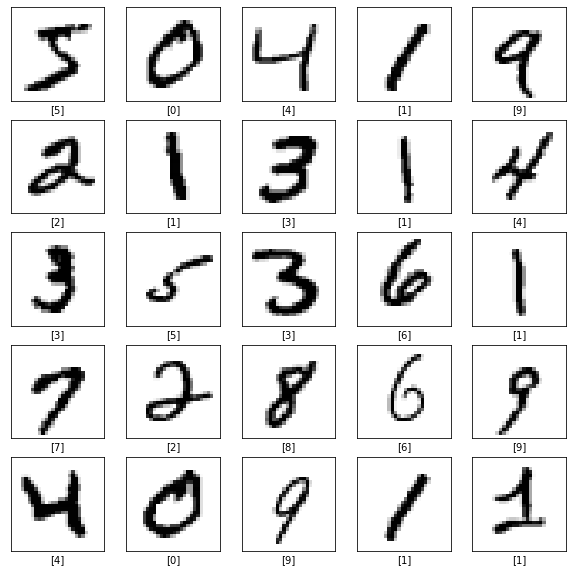

In [35]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)  # 1은 좌측 상단. 여기서부터 인덱스 시작
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel([train_labels[i]])
    plt.savefig('mnist_labels.png')
plt.show()


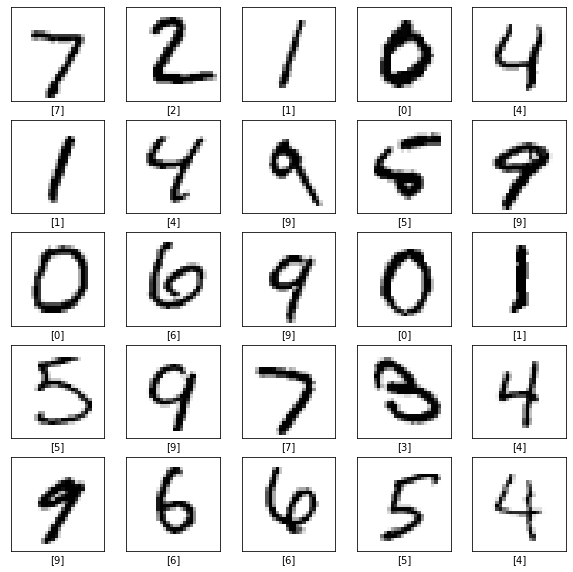

In [36]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)  # 1은 좌측 상단. 여기서부터 인덱스 시작
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel([test_labels[i]])
    plt.savefig('mnist_test_labels.png')
plt.show()


### Lenet-5
* 1998년 ReLU 발표 전 tanh를 활성화 함수로 사용
* 최대 풀링 대신 평균 풀링 사용 - 수용 영역 픽셀값의 평균을 서브샘플링 값으로

In [4]:
model01 = Sequential()
model01.add(Conv2D(filters = 6, kernel_size = 5, strides = 1, activation = 'tanh', input_shape = (28,28,1), padding = 'same'))
model01.add(AveragePooling2D(pool_size = 2, strides = 2, padding = 'valid'))
model01.add(Conv2D(filters = 16, kernel_size = 5, strides = 1, activation = 'tanh', padding = 'valid'))
model01.add(AveragePooling2D(pool_size = 2, strides = 2, padding = 'valid'))
model01.add(Conv2D(filters = 120, kernel_size = 5, strides = 1, activation = 'tanh', padding = 'valid'))

model01.add(Flatten()) # 합성곱 신경망의 출력을 1차원 벡터로 전환해서 다층 퍼셉트론으로 전달

model01.add(Dense(units = 84, activation = 'tanh'))
model01.add(Dense(units = 10, activation = 'softmax'))
model01.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

In [5]:
# 학습과정 설정
model01.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 학습 및 평가
hist01 = model01.fit(train_images, train_labels, epochs=15, validation_data = (test_images, test_labels))

Epoch 1/15
1875/1875 [==============================] - 14s 5ms/step - loss: 0.6634 - accuracy: 0.8234 - val_loss: 0.3145 - val_accuracy: 0.9100
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2757 - accuracy: 0.9186 - val_loss: 0.2279 - val_accuracy: 0.9328
Epoch 3/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2061 - accuracy: 0.9391 - val_loss: 0.1722 - val_accuracy: 0.9499
Epoch 4/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1634 - accuracy: 0.9514 - val_loss: 0.1380 - val_accuracy: 0.9596
Epoch 5/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1346 - accuracy: 0.9596 - val_loss: 0.1140 - val_accuracy: 0.9669
Epoch 6/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1143 - accuracy: 0.9659 - val_loss: 0.1000 - val_accuracy: 0.9694
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0994 - accuracy: 0.9704 - val_loss: 0.0873 - val_accuracy

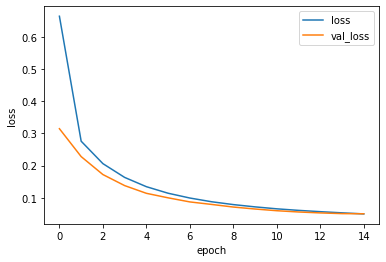

In [8]:
plt.plot(hist01.history['loss'], label = 'loss')
plt.plot(hist01.history['val_loss'], label = 'val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

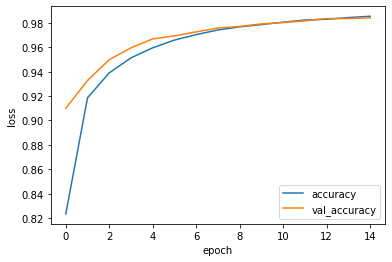

In [10]:
plt.plot(hist01.history['accuracy'], label = 'accuracy')
plt.plot(hist01.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

In [8]:
model22 = Sequential()
model22.add(Conv2D(filters = 6, kernel_size = 5, strides = 1, activation = 'relu', input_shape = (28,28,1), padding = 'same'))
model22.add(AveragePooling2D(pool_size = 2, strides = 2, padding = 'valid'))
model22.add(Conv2D(filters = 16, kernel_size = 5, strides = 1, activation = 'relu', padding = 'valid'))
model22.add(AveragePooling2D(pool_size = 2, strides = 2, padding = 'valid'))
model22.add(Conv2D(filters = 120, kernel_size = 5, strides = 1, activation = 'relu', padding = 'valid'))

model22.add(Flatten())

model22.add(Dense(units = 84, activation = 'relu'))
model22.add(Dense(units = 10, activation = 'softmax'))

In [9]:
# 학습과정 설정
model22.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 학습 및 평가
hist22 = model22.fit(train_images, train_labels, epochs=15)
hist22 = model22.evaluate(test_images, test_labels)

Epoch 1/15
1875/1875 [==============================] - 13s 5ms/step - loss: 0.8450 - accuracy: 0.7570
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2345 - accuracy: 0.9283
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1654 - accuracy: 0.9498
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1294 - accuracy: 0.9608
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1062 - accuracy: 0.9675
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0893 - accuracy: 0.9726
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0780 - accuracy: 0.9754
Epoch 8/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0688 - accuracy: 0.9783
Epoch 9/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0618 - accuracy: 0.9810
Epoch 10/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.05

### Lenet-5 활성화 함수 - relu, 최적화 adam 적용

In [23]:
model02 = Sequential()
model02.add(Conv2D(filters = 6, kernel_size = 5, strides = 1, activation = 'relu', input_shape = (28,28,1), padding = 'same'))
model02.add(MaxPooling2D(pool_size = 2, strides = 2, padding = 'same'))
model02.add(layers.Dropout(0.7))
model02.add(Conv2D(filters = 16, kernel_size = 5, strides = 1, activation = 'relu', padding = 'valid'))
model02.add(MaxPooling2D(pool_size = 2, strides = 2, padding = 'same'))
model02.add(layers.Dropout(0.7))
model02.add(Conv2D(filters = 120, kernel_size = 5, strides = 1, activation = 'relu', padding = 'valid'))

model02.add(Flatten())
model02.add(Dense(units = 84, activation = 'relu'))
model02.add(Dense(units = 10, activation = 'softmax'))


In [24]:
# 학습과정 설정
model02.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 학습 및 평가
hist02 = model02.fit(train_images, train_labels, epochs=15)
hist02 = model02.evaluate(test_images, test_labels)

Epoch 1/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6918 - accuracy: 0.7722
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3969 - accuracy: 0.8692
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3418 - accuracy: 0.8864
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3211 - accuracy: 0.8942
Epoch 5/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2977 - accuracy: 0.9029
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2893 - accuracy: 0.9045
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2805 - accuracy: 0.9084
Epoch 8/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2714 - accuracy: 0.9112
Epoch 9/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2632 - accuracy: 0.9134
Epoch 10/15
1875/1875 [==============================] - 10s 5ms/step - lo

hist02 = model02.evaluate(test_images, test_labels)

In [ ]:
model02 = Sequential()
model02.add(Conv2D(filters = 6, kernel_size = 5, strides = 1, activation = 'relu', input_shape = (28,28,1), padding = 'same'))
model02.add(AveragePooling2D(pool_size = 2, strides = 2, padding = 'valid'))
model02.add(Conv2D(filters = 16, kernel_size = 5, strides = 1, activation = 'relu', padding = 'valid'))
model02.add(AveragePooling2D(pool_size = 2, strides = 2, padding = 'valid'))
model02.add(Conv2D(filters = 120, kernel_size = 5, strides = 1, activation = 'relu', padding = 'valid'))

model02.add(Flatten())
model02.add(Dense(units = 84, activation = 'relu'))

model02.add(Dense(units = 10, activation = 'softmax'))


In [ ]:
# 학습과정 설정
model02.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 학습 및 평가
hist02 = model02.fit(train_images, train_labels, epochs=15)
hist02 = model02.evaluate(test_images, test_labels)

### Lenet-5 에포크에 따른 학습률 변동 적용

In [13]:
model03 = Sequential()
model03.add(Conv2D(filters = 6, kernel_size = 5, strides = 1, activation = 'relu', input_shape = (28,28,1), padding = 'same'))
model03.add(AveragePooling2D(pool_size = 2, strides = 2, padding = 'valid'))
model03.add(Conv2D(filters = 16, kernel_size = 5, strides = 1, activation = 'relu', padding = 'valid'))
model03.add(AveragePooling2D(pool_size = 2, strides = 2, padding = 'valid'))
model03.add(Conv2D(filters = 120, kernel_size = 5, strides = 1, activation = 'relu', padding = 'valid'))

model03.add(Flatten())

model03.add(Dense(units = 84, activation = 'relu'))
model03.add(Dense(units = 10, activation = 'softmax'))

In [14]:
def learning_rate(epoch):
  if epoch <= 2:
    rate = 5e-4
  elif epoch > 2 and epoch <= 5:
    rate = 2e-4
  elif epoch > 5 and epoch <= 9:
    rate = 5e-5
  else:
    rate = 1e-5
  return rate

In [15]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler

teacher = LearningRateScheduler(learning_rate)
checkpoint = ModelCheckpoint(filepath = 'path_to_save_file/file.hdf5',
                             monitor = 'val_acc',
                             verbose = 1,
                             save_best_only=True)

callbacks = [checkpoint, teacher]

model03.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [16]:
history = model01.fit(train_images, train_labels, batch_size = 32, epochs = 15, validation_data = (test_images, test_labels), callbacks = callbacks, verbose=2, shuffle=True)

Epoch 1/15
1875/1875 - 9s - loss: 0.0423 - accuracy: 0.9880 - val_loss: 0.0459 - val_accuracy: 0.9855 - lr: 5.0000e-04 - 9s/epoch - 5ms/step
Epoch 2/15
1875/1875 - 9s - loss: 0.0418 - accuracy: 0.9884 - val_loss: 0.0458 - val_accuracy: 0.9854 - lr: 5.0000e-04 - 9s/epoch - 5ms/step
Epoch 3/15
1875/1875 - 8s - loss: 0.0416 - accuracy: 0.9882 - val_loss: 0.0454 - val_accuracy: 0.9851 - lr: 5.0000e-04 - 8s/epoch - 4ms/step
Epoch 4/15
1875/1875 - 9s - loss: 0.0413 - accuracy: 0.9884 - val_loss: 0.0456 - val_accuracy: 0.9854 - lr: 2.0000e-04 - 9s/epoch - 5ms/step
Epoch 5/15
1875/1875 - 8s - loss: 0.0412 - accuracy: 0.9886 - val_loss: 0.0455 - val_accuracy: 0.9854 - lr: 2.0000e-04 - 8s/epoch - 5ms/step
Epoch 6/15
1875/1875 - 9s - loss: 0.0411 - accuracy: 0.9885 - val_loss: 0.0455 - val_accuracy: 0.9854 - lr: 2.0000e-04 - 9s/epoch - 5ms/step
Epoch 7/15
1875/1875 - 9s - loss: 0.0410 - accuracy: 0.9884 - val_loss: 0.0455 - val_accuracy: 0.9853 - lr: 5.0000e-05 - 9s/epoch - 5ms/step
Epoch 8/15
18

### Alexnet 신경망 적용 테스트

In [12]:
# Alexnet 신경망 적용 테스트

def Alexnet_Test():
  intro = keras.Input(shape=(28,28,1))

  c1 = layers.Conv2D(filters=64, kernel_size = (3,3), strides=1, padding='same', activation = 'relu')(intro)
  p1 = layers.MaxPooling2D(pool_size=(2,2), padding='same')(c1)
  n1 = BatchNormalization()(p1)
  d1 = layers.Dropout(0.8)(n1)

  c2 = layers.Conv2D(filters=128, kernel_size = (3,3), strides=1, padding='same', activation = 'relu')(d1)
  p2 = layers.MaxPooling2D(pool_size=(2,2), padding='same')(c2)
  n2 = BatchNormalization()(p2)
  d2 = layers.Dropout(0.8)(n2)

  c3 = layers.Conv2D(filters=256, kernel_size = (3,3), strides=1, padding='same', activation = 'relu')(d2)
  p3 = layers.MaxPooling2D(pool_size=(2,2), padding='same')(c3)
  n3 = BatchNormalization()(p3)
  d3 = layers.Dropout(0.8)(n3)

  f1 = layers.Flatten()(d3)
  d1 = layers.Dense(1024, activation = 'relu')(f1)
  d2 = layers.Dense(1024, activation = 'relu')(d1)

  outro = layers.Dense(10, activation = 'softmax')(d2)
  return keras.Model(intro, outro)

model_al = Alexnet_Test()
model_al.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 64)       256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 128)       73856 

In [13]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor = np.sqrt(0.1))
optimizer = keras.optimizers.SGD(lr = 0.01, momentum = 0.9)


model_al.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model_al.fit(train_images, train_labels, epochs=50, validation_data = (test_images, test_labels), 
                    callbacks = [reduce_lr])

C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/50
1875/1875 [==============================] - 17s 8ms/step - loss: 0.5431 - accuracy: 0.8270 - val_loss: 0.2523 - val_accuracy: 0.9274 - lr: 0.0100
Epoch 2/50
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2643 - accuracy: 0.9174 - val_loss: 0.2236 - val_accuracy: 0.9375 - lr: 0.0100
Epoch 3/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2143 - accuracy: 0.9329 - val_loss: 0.1144 - val_accuracy: 0.9675 - lr: 0.0100
Epoch 4/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1909 - accuracy: 0.9402 - val_loss: 0.1122 - val_accuracy: 0.9648 - lr: 0.0100
Epoch 5/50
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1739 - accuracy: 0.9463 - val_loss: 0.0795 - val_accuracy: 0.9764 - lr: 0.0100
Epoch 6/50
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1593 - accuracy: 0.9501 - val_loss: 0.0929 - val_accuracy: 0.9742 - lr: 0.0100
Epoch 7/50
1875/1875 [==============================

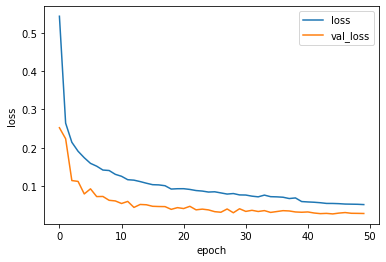

In [19]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.savefig('output.png', dpi=300)

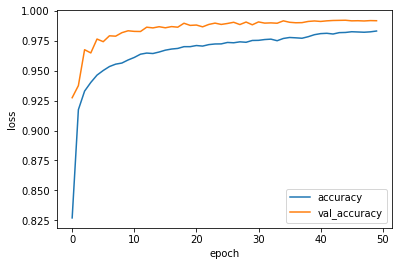

In [20]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.savefig('output2.png', dpi=300)

### Alexnet 신경망 변형1 테스트

In [21]:
def Alexnet_Test_2():
  intro = keras.Input(shape=(28,28,1))

  c1 = layers.Conv2D(filters=64, kernel_size = (3,3), strides=1, padding='same', activation = 'relu')(intro)
  p1 = layers.AveragePooling2D(pool_size=(2,2), padding='valid')(c1)
  n1 = BatchNormalization()(p1)
  d1 = layers.Dropout(0.8)(n1)

  c2 = layers.Conv2D(filters=128, kernel_size = (3,3), strides=1, padding='valid', activation = 'relu')(d1)
  p2 = layers.AveragePooling2D(pool_size=(2,2), padding='valid')(c2)
  n2 = BatchNormalization()(p2)
  d2 = layers.Dropout(0.8)(n2)

  c3 = layers.Conv2D(filters=256, kernel_size = (3,3), strides=1, padding='valid', activation = 'relu')(d2)
  p3 = layers.AveragePooling2D(pool_size=(2,2), padding='valid')(c3)
  n3 = BatchNormalization()(p3)
  d3 = layers.Dropout(0.8)(n3)

  f1 = layers.Flatten()(d3)
  d1 = layers.Dense(1024, activation = 'relu')(f1)
  d2 = layers.Dense(1024, activation = 'relu')(d1)

  outro = layers.Dense(10, activation = 'softmax')(d2)
  return keras.Model(intro, outro)

model05 = Alexnet_Test_2()

In [25]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor = np.sqrt(0.1))
optimizer = keras.optimizers.SGD(lr = 0.01, momentum = 0.9)


model05.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist_05 = model05.fit(train_images, train_labels, epochs=50, validation_data = (test_images, test_labels), 
                    callbacks = [reduce_lr])

Epoch 1/15
1875/1875 [==============================] - 16s 8ms/step - loss: 0.5191 - accuracy: 0.8340
Epoch 2/15
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2363 - accuracy: 0.9267
Epoch 3/15
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1973 - accuracy: 0.9398
Epoch 4/15
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1734 - accuracy: 0.9477
Epoch 5/15
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1603 - accuracy: 0.9528
Epoch 6/15
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1494 - accuracy: 0.9562
Epoch 7/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1438 - accuracy: 0.9581
Epoch 8/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1338 - accuracy: 0.9605
Epoch 9/15
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1311 - accuracy: 0.9617
Epoch 10/15
1875/1875 [==============================] - 15s 8ms/step - l

AttributeError: 'History' object has no attribute 'evaluate'

In [21]:
def vgg_test():
  intro = keras.Input(shape=(28,28,1))

  c1 = layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu')(intro)
  c2 = layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same',  activation = 'relu')(c1)
  m1 = layers.MaxPool2D(pool_size =(2,2), padding = 'same')(c2)

  c3 = layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same',  activation = 'relu')(m1)
  c4 = layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same',  activation = 'relu')(c3)
  m2 = layers.MaxPool2D(pool_size =(2,2), padding = 'same')(c4)

  f1 = layers.Flatten()(m2)

  d1 = layers.Dense(4096, activation='relu')(f1)
  dr1 = layers.Dropout(0.5)(d1)
  d2 = layers.Dense(1000, activation = 'relu')(dr1)

  outro = layers.Dense(10, activation = 'softmax')(d2)
  
  return keras.Model(intro, outro)

model_vgg = vgg_test()
model_vgg.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 conv2d_12 (Conv2D)          (None, 14, 14, 128)       147584    
                                                           

In [22]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor = np.sqrt(0.1))
optimizer = keras.optimizers.SGD(lr = 0.01, momentum = 0.9)


model_vgg.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model_vgg.fit(train_images, train_labels, epochs=50, validation_data = (test_images, test_labels), 
                    callbacks = [reduce_lr])

Epoch 1/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1991 - accuracy: 0.9358 - val_loss: 0.0372 - val_accuracy: 0.9877 - lr: 0.0100
Epoch 2/50
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0464 - accuracy: 0.9858 - val_loss: 0.0330 - val_accuracy: 0.9896 - lr: 0.0100
Epoch 3/50
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0318 - accuracy: 0.9898 - val_loss: 0.0242 - val_accuracy: 0.9924 - lr: 0.0100
Epoch 4/50
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0219 - accuracy: 0.9931 - val_loss: 0.0206 - val_accuracy: 0.9930 - lr: 0.0100
Epoch 5/50
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0173 - accuracy: 0.9948 - val_loss: 0.0195 - val_accuracy: 0.9934 - lr: 0.0100
Epoch 6/50
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0140 - accuracy: 0.9954 - val_loss: 0.0276 - val_accuracy: 0.9913 - lr: 0.0100
Epoch 7/50
1875/1875 [==============================

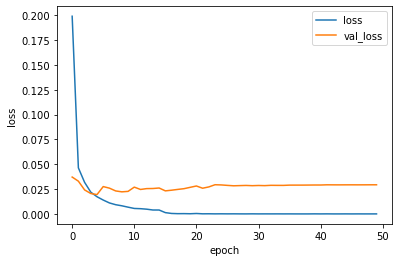

In [23]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.savefig('output.png', dpi=300)

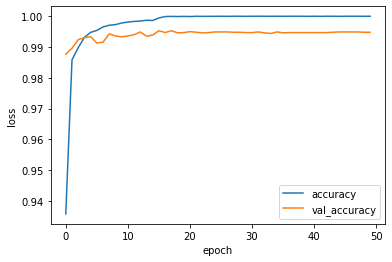

In [24]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.savefig('output2.png', dpi=300)

In [37]:
predictions = model_vgg.predict(test_images)

313/313 [==============================] - 1s 4ms/step


In [46]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

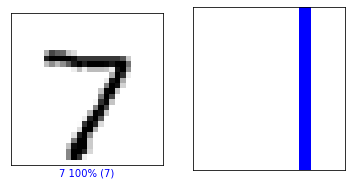

In [47]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

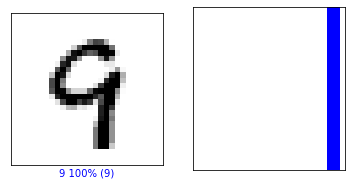

In [48]:
i = 150
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

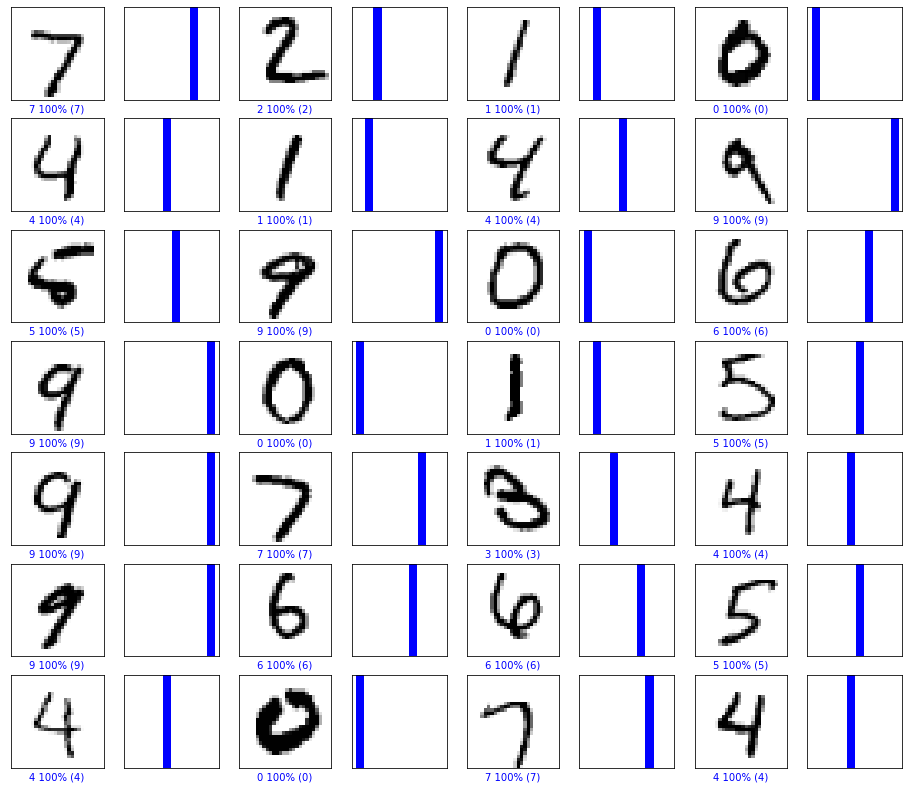

In [51]:
num_rows = 7
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.savefig('visual.png')
plt.show()

## Fashion MNIST 에 VGGNET 적용 테스트

In [3]:
# 패션 MNIST 데이터 로드
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 출력을 위해, 클래스 이름 선언
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
# 훈련 데이터 확인
train_images.shape

(60000, 28, 28)

In [5]:
len(train_images)

60000

In [6]:
train_labels
print(train_labels[0])

9


In [7]:
# 테스트 데이터 확인
test_images.shape

(10000, 28, 28)

In [8]:
# 데이터 전처리
train_images = train_images / 255.0
test_images = test_images / 255.0

In [9]:
def vgg_test():
  intro = keras.Input(shape=(28,28,1))

  c1 = layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu')(intro)
  c2 = layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same',  activation = 'relu')(c1)
  m1 = layers.MaxPool2D(pool_size =(2,2), padding = 'same')(c2)

  c3 = layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same',  activation = 'relu')(m1)
  c4 = layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same',  activation = 'relu')(c3)
  m2 = layers.MaxPool2D(pool_size =(2,2), padding = 'same')(c4)

  f1 = layers.Flatten()(m2)

  d1 = layers.Dense(4096, activation='relu')(f1)
  dr1 = layers.Dropout(0.5)(d1)
  d2 = layers.Dense(1000, activation = 'relu')(dr1)

  outro = layers.Dense(10, activation = 'softmax')(d2)
  
  return keras.Model(intro, outro)

model_vggg = vgg_test()
model_vggg.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 128)       147584    
                                                             

In [10]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor = np.sqrt(0.1))
optimizer = keras.optimizers.SGD(lr = 0.01, momentum = 0.9)


model_vggg.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model_vggg.fit(train_images, train_labels, epochs=20, validation_data = (test_images, test_labels), 
                    callbacks = [reduce_lr])

C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
1875/1875 [==============================] - 23s 8ms/step - loss: 0.4911 - accuracy: 0.8209 - val_loss: 0.3253 - val_accuracy: 0.8832 - lr: 0.0100
Epoch 2/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2801 - accuracy: 0.8967 - val_loss: 0.2568 - val_accuracy: 0.9053 - lr: 0.0100
Epoch 3/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2308 - accuracy: 0.9141 - val_loss: 0.2481 - val_accuracy: 0.9098 - lr: 0.0100
Epoch 4/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1980 - accuracy: 0.9272 - val_loss: 0.2282 - val_accuracy: 0.9166 - lr: 0.0100
Epoch 5/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1744 - accuracy: 0.9352 - val_loss: 0.2372 - val_accuracy: 0.9167 - lr: 0.0100
Epoch 6/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1508 - accuracy: 0.9437 - val_loss: 0.2256 - val_accuracy: 0.9185 - lr: 0.0100
Epoch 7/20
1875/1875 [==============================

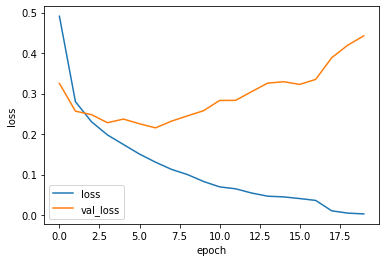

In [11]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.savefig('output.png', dpi=300)

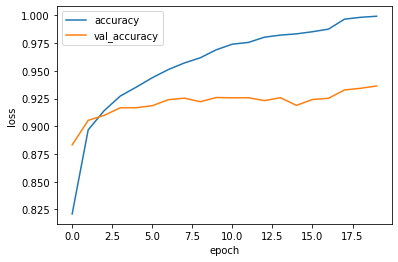

In [12]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.savefig('output2.png', dpi=300)

In [13]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [15]:
predictions = model_vggg.predict(test_images)

313/313 [==============================] - 1s 4ms/step


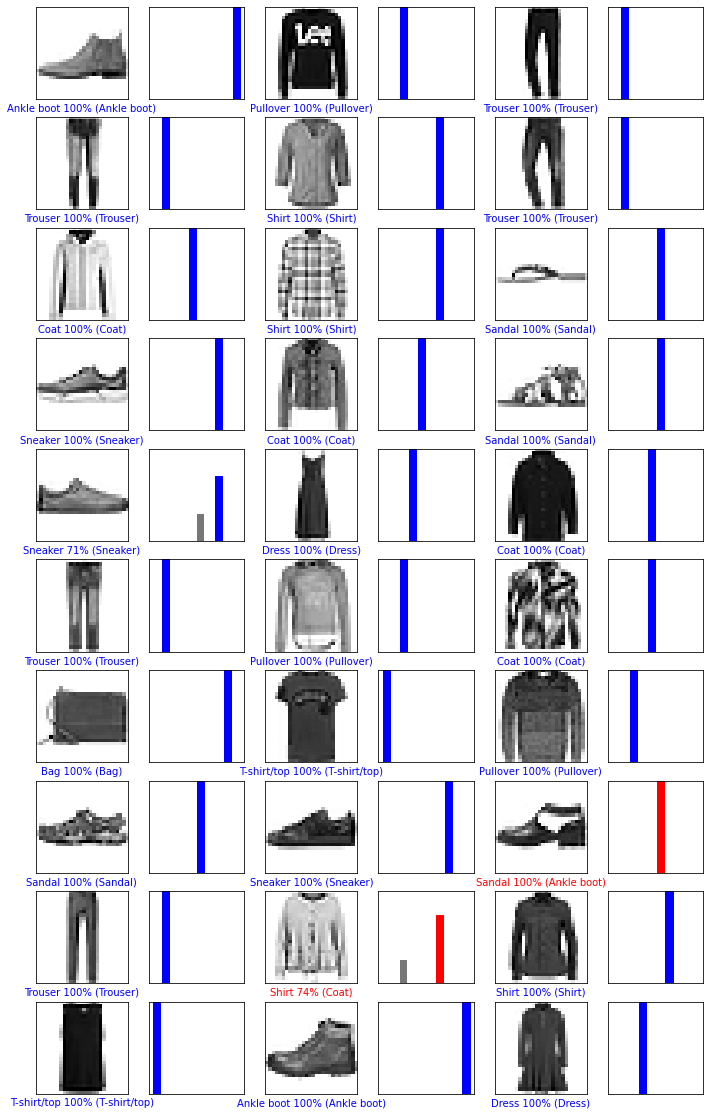

In [16]:
num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()